In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv')                   

In [5]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\n prices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
 prices df shape: (7914, 1241)


In [6]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [7]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [8]:
prices.columns

Index(['905270', '921795', '904261', '905261', '916328', '923024', '936365',
       '902355', '912215', '929813',
       ...
       '9889RL', '69568X', '543755', '77463M', '29235J', '131745', '69487D',
       '68157P', '9110RA', '292703'],
      dtype='object', length=1241)

In [9]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Data frame to hold returns
daily_r = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_r.columns:
    daily_r[col] = daily_r[col].pct_change()*100

In [11]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
daily_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Resample to weekly
weekly_r = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_r.columns:
    weekly_r[col] = weekly_r[col].pct_change()*100

In [14]:
weekly_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Running linear regression on a sample stock
import datetime as dt

weekly_no_index = weekly_r.reset_index()
weekly_no_index["date"] = weekly_no_index.date.map(dt.datetime.toordinal)

weekly_no_index[["date", "936365"]]

,date,936365
0,726474,NaN
1,726481,-3.622047
2,726488,-0.980392
3,726495,-0.990099
4,726502,-3.666667
...,...,...
1634,737912,4.051410
1635,737919,-6.778209
1636,737926,-4.225280
1637,737933,1.442128


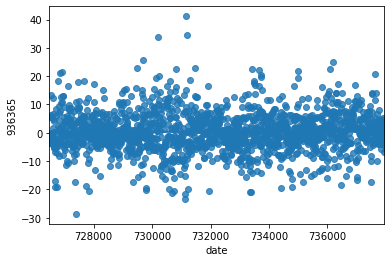

In [16]:
sns.regplot(data=weekly_no_index, x="date", y="936365")

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_df = weekly_no_index[~weekly_no_index["936365"].isna()]
model.fit(X=new_df[["date"]], y=new_df["936365"])

LinearRegression()

In [18]:
print("Line formula for 936365: \nreturn = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * date")

Line formula for 936365: 
return = -21.846821045157913 + 3.0427665472240984e-05 * date


In [19]:
model.predict(pd.DataFrame([[737947]]))[0]

0.6071834070859055

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = {}

def linear_predict(stock):
    new_df = weekly_no_index[["date", stock]]
    new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_df = new_df[~new_df[stock].isna()]
    if new_df.shape[0] != 0:
        model.fit(X=new_df[["date"]], y=new_df[stock])
        print("Line formula for " + stock + ": \n\treturn = " + str(model.intercept_) + " + " +
              str(model.coef_[0]) + " * date")
        predictions[stock] = model.predict(pd.DataFrame([[737969]]))[0]
        y_pred = model.predict(new_df[["date"]])
        print("\tr2 score: " + str(r2_score(y_true=new_df[stock], y_pred=y_pred)))

In [21]:
current_stocks = weekly_no_index.columns[weekly_no_index.iloc[-1] != 0][1:]

for stock in current_stocks:
    linear_predict(stock)

Line formula for 916328: 
	return = 1.8237969622087267 + -2.160673182118806e-06 * date
	r2 score: 7.666803983008563e-06
Line formula for 936365: 
	return = -21.846821045157913 + 3.0427665472240984e-05 * date
	r2 score: 0.0002014708249141739
Line formula for 905271: 
	return = -1.194664876694092 + 1.963034096719461e-06 * date
	r2 score: 4.8880366928516494e-06
Line formula for 905113: 
	return = -2.3372183214951407 + 3.3925288405958527e-06 * date
	r2 score: 6.325314360178247e-06
Line formula for 905802: 
	return = -12.143692416806738 + 1.683760005030197e-05 * date
	r2 score: 0.00019097182515082078
Line formula for 905425: 
	return = -9.887413035642494 + 1.3627548445046124e-05 * date
	r2 score: 0.0003269221723332105
Line formula for 906156: 
	return = -3.6761854967453527 + 5.356033827743527e-06 * date
	r2 score: 2.2719329404785604e-05
Line formula for 916305: 
	return = 21.276949212950203 + -2.884751684495059e-05 * date
	r2 score: 0.00018566583147794358
Line formula for 992816: 
	return =

	r2 score: 0.0018408828498709395
Line formula for 916901: 
	return = -15.224248372217993 + 2.1284115317243894e-05 * date
	r2 score: 4.930853242912647e-05
Line formula for 951849: 
	return = -0.5431650356189447 + 1.0998878008369662e-06 * date
	r2 score: 1.047439656010063e-06
Line formula for 921456: 
	return = -78.56874054923479 + 0.00010773409880148497 * date
	r2 score: 0.00010240927897231522
Line formula for 912138: 
	return = 399.615801180594 + -0.0005480802247321332 * date
	r2 score: 0.010456313879789514
Line formula for 902230: 
	return = -0.9933441735194342 + 1.5407785639599382e-06 * date
	r2 score: 1.2603307932845809e-06
Line formula for 923449: 
	return = -2.721101754402663 + 3.885851041291971e-06 * date
	r2 score: 9.105357452354745e-06
Line formula for 951018: 
	return = 31.01861863989257 + -4.197804349792959e-05 * date
	r2 score: 0.0008948174696263855
Line formula for 907652: 
	return = 16.012382520266492 + -2.151565603487732e-05 * date
	r2 score: 0.0005703948670513492
Line fo

	r2 score: 0.0015163711399526214
Line formula for 921757: 
	return = 7.77088751119762 + -1.0261088266036506e-05 * date
	r2 score: 9.456972967158972e-05
Line formula for 902314: 
	return = 14.00056674450963 + -1.9025499458946517e-05 * date
	r2 score: 0.00018934730921027487
Line formula for 944175: 
	return = -7.007696985844327 + 9.841553567028956e-06 * date
	r2 score: 8.391697268028686e-05
Line formula for 901897: 
	return = -5.970058302542845 + 8.452541288454454e-06 * date
	r2 score: 8.944019661816238e-05
Line formula for 905150: 
	return = -7.318559717457441 + 1.0385591192926134e-05 * date
	r2 score: 9.416665527195445e-05
Line formula for 905677: 
	return = 14.140250141268401 + -1.904911792825321e-05 * date
	r2 score: 0.0007708815810373304
Line formula for 912157: 
	return = -17.81938821290001 + 2.4673317585361064e-05 * date
	r2 score: 0.00045099308501828084
Line formula for 904030: 
	return = 30.650157158193267 + -4.1586947918438924e-05 * date
	r2 score: 0.002409575633476546
Line for

Line formula for 905647: 
	return = 22.226886574150015 + -2.9908727534354924e-05 * date
	r2 score: 0.0006237229640053688
Line formula for 702635: 
	return = 39.4233019547051 + -5.3138488841933125e-05 * date
	r2 score: 0.0018443488509940487
Line formula for 999506: 
	return = 24.482625683353884 + -3.2779209994310155e-05 * date
	r2 score: 0.00027992525707964955
Line formula for 32480Q: 
	return = 4.985393203172151 + -6.5441848787124694e-06 * date
	r2 score: 2.1333237867793287e-05
Line formula for 325824: 
	return = 8.041788757276999 + -1.0647258884160118e-05 * date
	r2 score: 5.8877107250054905e-05
Line formula for 905296: 
	return = 27.3507073986838 + -3.6704514423597225e-05 * date
	r2 score: 0.0005917636581370678
Line formula for 905840: 
	return = 21.11602497615412 + -2.8557474607699408e-05 * date
	r2 score: 0.0006497612214955151
Line formula for 154423: 
	return = -4.706506499576183 + 6.738558404052199e-06 * date
	r2 score: 4.678078448061562e-05
Line formula for 945251: 
	return = -6

	r2 score: 0.002987147577817262
Line formula for 772128: 
	return = 29.182658829764947 + -3.953795531780369e-05 * date
	r2 score: 0.000421831059765454
Line formula for 546370: 
	return = 66.46401840301263 + -9.00531016515555e-05 * date
	r2 score: 0.002810074149421249
Line formula for 905816: 
	return = -10.352105079967197 + 1.4428485164561066e-05 * date
	r2 score: 0.0001930447926297152
Line formula for 905276: 
	return = 30.08354054138099 + -4.054794622986362e-05 * date
	r2 score: 0.000827211957056817
Line formula for 325972: 
	return = 70.28826317661654 + -9.547538206365055e-05 * date
	r2 score: 0.003315286924486127
Line formula for 906487: 
	return = 16.245738995969496 + -2.1879373282742134e-05 * date
	r2 score: 0.00043363548892250137
Line formula for 902607: 
	return = 11.63244261680655 + -1.5673941887853313e-05 * date
	r2 score: 0.00039424873836058083
Line formula for 729104: 
	return = 17.678046288630444 + -2.3652226134496362e-05 * date
	r2 score: 0.0003861138264007469
Line formul

	r2 score: 0.0001573215406162065
Line formula for 912146: 
	return = 32.892995059971305 + -4.4667445480077954e-05 * date
	r2 score: 0.002003692755332298
Line formula for 31604H: 
	return = -34.14409671745138 + 4.688730699288889e-05 * date
	r2 score: 0.00036786432735669283
Line formula for 912219: 
	return = 17.38075129944004 + -2.3180649284870835e-05 * date
	r2 score: 0.0002222283950882309
Line formula for 326996: 
	return = 49.29744368381152 + -6.693406553453892e-05 * date
	r2 score: 0.003237139422863522
Line formula for 891399: 
	return = 96.49105084813884 + -0.00013042868722207762 * date
	r2 score: 0.0024319597984917563
Line formula for 28367U: 
	return = 22.969485735824023 + -3.103299481325041e-05 * date
	r2 score: 4.650976957187858e-05
Line formula for 772209: 
	return = -5.766585802998298 + 8.23985231840232e-06 * date
	r2 score: 3.3666684238431444e-05
Line formula for 867375: 
	return = -21.61261551988481 + 2.9911764865840337e-05 * date
	r2 score: 0.00060790849566561
Line formula

Line formula for 921999: 
	return = -18.71542449664558 + 2.57106583102266e-05 * date
	r2 score: 0.0011922727288279367
Line formula for 328595: 
	return = 4.510929926038807 + -5.563929248791444e-06 * date
	r2 score: 2.0992841618605595e-05
Line formula for 500344: 
	return = 43.95347629821245 + -5.9580599620046326e-05 * date
	r2 score: 0.0018874818067590171
Line formula for 545004: 
	return = 58.1271072134912 + -7.891685949661518e-05 * date
	r2 score: 0.0029620491579261943
Line formula for 50394K: 
	return = -152.16864910468018 + 0.00020731881526293638 * date
	r2 score: 0.004614697364709985
Line formula for 677091: 
	return = 19.237474764420845 + -2.567009043298525e-05 * date
	r2 score: 0.00010859739465685081
Line formula for 906785: 
	return = 13.447284309653892 + -1.7806005417134845e-05 * date
	r2 score: 7.219536082159195e-05
Line formula for 36218Q: 
	return = 131.3445354980491 + -0.000178124604528026 * date
	r2 score: 0.001659738869337457
Line formula for 696306: 
	return = -37.96087

	r2 score: 0.0002853528281986373
Line formula for 923602: 
	return = 13.435907357582547 + -1.7611127580712123e-05 * date
	r2 score: 7.096105177650802e-05
Line formula for 134057: 
	return = 1.7404970957291235 + -2.1200763803642226e-06 * date
	r2 score: 5.059496081649684e-06
Line formula for 9269TG: 
	return = 51.26891053145762 + -6.913585072676969e-05 * date
	r2 score: 0.000489388702960003
Line formula for 945411: 
	return = -7.741430964714347 + 1.1015338105640221e-05 * date
	r2 score: 7.682615940651782e-05
Line formula for 14806F: 
	return = 25.519980067114496 + -3.431731505191949e-05 * date
	r2 score: 0.00040793416827256124
Line formula for 54060C: 
	return = -44.01967069239339 + 6.035611900398709e-05 * date
	r2 score: 0.0010169981838458186
Line formula for 96699P: 
	return = -357.43067756272006 + 0.00048521057867089226 * date
	r2 score: 0.005041742899541957
Line formula for 9801CJ: 
	return = -125.53319817618141 + 0.000170201651083423 * date
	r2 score: 0.0010291692960728849
Line for

	r2 score: 0.0003178354395428906
Line formula for 41103J: 
	return = -31.42298065072978 + 4.3293612611918205e-05 * date
	r2 score: 0.00016566276909035782
Line formula for 518628: 
	return = -5.343964736373762 + 7.94015288224517e-06 * date
	r2 score: 2.613421067143573e-05
Line formula for 50901M: 
	return = -105.36776125558481 + 0.0001439248475490047 * date
	r2 score: 0.0030371540706067846
Line formula for 777953: 
	return = -28.683062390580574 + 3.9809678282122774e-05 * date
	r2 score: 0.0003685790832768099
Line formula for 50314E: 
	return = -57.402626122583776 + 7.849532272754366e-05 * date
	r2 score: 0.001738958014348091
Line formula for 69723H: 
	return = 144.6104723601557 + -0.00019583008422869978 * date
	r2 score: 0.004592742412113937
Line formula for 921934: 
	return = -5.649828595505837 + 8.10837889693799e-06 * date
	r2 score: 3.490008060280658e-05
Line formula for 91240W: 
	return = -385.8835625129936 + 0.0005242606971534252 * date
	r2 score: 0.004492504549475362
Line formula 

In [22]:
# Ordered list of stocks and their predicted returns
sorted_values = sorted(predictions.values(), reverse=True)

sorted_dict = {}
for i in sorted_values:
    for k in predictions.keys():
        if predictions[k] == i:
            sorted_dict[k] = predictions[k]
            break

count = 1
for stock in sorted_dict:
    stock_name = info.loc[info.Instrument == stock, "NAME"].values[0]
    if "DELIST" in stock_name:
        continue
    print(str(count) + ". " + stock_name + ": " + str(sorted_dict[stock]))
    count += 1

1. ENPHASE ENERGY: 3.0527725898091376
2. GAMESTOP 'A': 2.473489697285231
3. ETSY: 2.361854999513639
4. CAESARS ENTERTAINMENT: 1.6243070434935873
5. TESLA: 1.5944002786995952
6. ADIENT: 1.554214539173472
7. VONTIER: 1.5364066832735261
8. DOW ORD SHS: 1.3991023304372447
9. CORTEVA: 1.3760758442565475
10. BRIGHTHOUSE FINANCIAL: 1.2560972450362442
11. FOX A: 1.1357422114494966
12. PAYPAL HOLDINGS: 1.1351158839930235
13. FOX B: 1.0880348295534077
14. GENERAC HOLDINGS: 1.0422022201434231
15. DEXCOM: 1.0328113467536326
16. TWITTER: 1.0045799046224602
17. ALIGN TECHNOLOGY: 0.9891612420323668
18. UNDER ARMOUR 'C': 0.8941602893545451
19. MSCI: 0.8443145653066324
20. MARKETAXESS HOLDINGS: 0.8388926862905492
21. T-MOBILE US: 0.8262096760937254
22. FORTINET: 0.8147710834676616
23. KEYSIGHT TECHNOLOGIES: 0.8014106168086244
24. CATALENT: 0.7779503111995041
25. ALPHABET 'C': 0.776563074535801
26. APPLE: 0.7462058105913414
27. OLD DOMINION FGT.LINES: 0.7445898090188408
28. NETFLIX: 0.740651986999616
29

413. RAYTHEON TECHNOLOGIES: 0.16005437451510574
414. NISOURCE: 0.15990961579255147
415. FIFTH THIRD BANCORP: 0.15895136358633088
416. WELLTOWER: 0.15857169844439545
417. SIMON PROPERTY GROUP: 0.15788861090463158
418. AMEREN: 0.15744768191509806
419. MARATHON OIL: 0.1560758930380679
420. VIACOMCBS B: 0.1559876324135887
421. SOUTHWEST AIRLINES: 0.15517282434964486
422. EMERSON ELECTRIC: 0.1523563355300377
423. CLOROX: 0.15043860525118635
424. WILLIAMS: 0.15019726654618282
425. NEKTAR THERAPEUTICS: 0.149161041334132
426. 3M: 0.14799335394669821
427. BIG LOTS: 0.14798507478820255
428. TEGNA: 0.14653585268853142
429. EQT: 0.14638676525309613
430. JOHNSON CONTROLS INTL.: 0.14587675517305598
431. HP: 0.14421651406928504
432. KROGER: 0.1439981075454817
433. FORD MOTOR: 0.1437026425475174
434. ROBERT HALF INTL.: 0.1435266292389521
435. AMERISOURCEBERGEN: 0.14326256362398837
436. CHUBB: 0.1422656244833007
437. ABERCROMBIE & FITCH 'A': 0.1419515266126048
438. AVALONBAY COMMNS.: 0.1370111525041846